# Happiness Report

## Introduction

The motivation to investigate this work comes from the will to understand the countries' characteristics in respect to a few factors, and hopefully follow the examples of nations that managed to incorporate happiness among its citizens. What can we infer about happiness taking economy, generosity or freedom into account? Can Linear Regression be used to predict Happiness Score?

The dataset from the World Happiness Report from the years of 2015 to 2019 is based on the World Hapiness Report on Kaggle 
([originally found here](
https://www.kaggle.com/unsdsn/world-happiness)). The .csv files and the "UCSD" module created can be found [here](https://drive.google.com/drive/folders/1XvheMoBAUjIyxDJ4fHdj_SFvahdutXhk?usp=sharing)

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.random import random
import ucsd #module created in order to shorten the Jupyter Notebook
from math import sqrt
%matplotlib inline

In [68]:
#Importing the datasets

data2015 = pd.read_csv('~/Git/UCSanDiegoX/Week 9 and 10 - Final Project/Happiness/2015.csv', index_col = 'Happiness Rank') 
data2016 = pd.read_csv('~/Git/UCSanDiegoX/Week 9 and 10 - Final Project/Happiness/2016.csv', index_col = 'Happiness Rank')
data2017 = pd.read_csv('~/Git/UCSanDiegoX/Week 9 and 10 - Final Project/Happiness/2017.csv', index_col = 'Happiness Rank')
data2018 = pd.read_csv('~/Git/UCSanDiegoX/Week 9 and 10 - Final Project/Happiness/2018.csv', index_col = 'Happiness Rank')
data2019 = pd.read_csv('~/Git/UCSanDiegoX/Week 9 and 10 - Final Project/Happiness/2019.csv', index_col = 'Happiness Rank')
regions = pd.read_csv('~/Git/UCSanDiegoX/Week 9 and 10 - Final Project/Happiness/regions.csv')



In [69]:
#Creating columns for those dataframes that do not have Year, Region and/or Colormap columns

data2015['Year'] = 2015
data2016['Year'] = 2016
data2017['Year'] = 2017
data2018['Year'] = 2018
data2019['Year'] = 2019

data2017['Region'] = 0
data2018['Region'] = 0
data2019['Region'] = 0

## Intersection to find the common parameters:

In [70]:
commonParameters = set(data2015.head(0)).intersection(
                   set(data2016.head(0)),
                   set(data2017.head(0)), 
                   set(data2018.head(0)), 
                   set(data2019.head(0)))


## Removing Columns

It is necessary to eliminate some columns which will be not performed any sort of analysis

In [71]:
#this function deletes the columns from dataframe1 that are not in dataframe2
def remove_column(dataframe1, dataframe2):
    for parameter in list(dataframe1.head(0)):
        if parameter not in dataframe2:
            del dataframe1[parameter] 

remove_column(data2015,commonParameters)
remove_column(data2016,commonParameters)
remove_column(data2017,commonParameters)
remove_column(data2018,commonParameters)
remove_column(data2019,commonParameters)

## Assigning a Region value to the country

For this, it was created a python module that replaces the value of Region according to the Country. 

#### Example:

    target_dataframe.loc[target_dataframe['Country'] == 'Nepal', 'Region'] = 'Southern Asia'
    
 assigns 'Southern Asia' to the Region field where the Country == 'Nepal' condition is met 

In [72]:
ucsd.setRegionToDataFrame(data2017)
ucsd.setRegionToDataFrame(data2018)
ucsd.setRegionToDataFrame(data2019)


### Defining plot function

For the scatterplot function, one may see several needed attributes for the proper plot to be shown. Sometimes the dot radius is too little to be seen, so the factors slope and exponent are used to distinguish some desirable characteristic as a sort of a third dimension variable. 

For example, let's say we want to investigate how the Economy GDP behaves as we analyze the Generosity x Happiness Score plot. We can see that, for the year of 2015, Generosity does not directly influence the Happiness Score and, albeit considered an outlier here, the most generous country (Myanmar) has a low Happiness Score.
On the other hand, we can clearly realize how countries with lower GDP occupy lower positions on the plot. The bigger the dot size the bigger the GDP per capita. The dot radius here is multiplicated by a factor of 40 for the sake of visualization.

In [73]:
    def scatterplot(dataframe, x, y, sizeVariable, slope=1, exponent=1, xmax=1.8, ymax=8):
        regions = set(dataframe['Region'])
        title = str(dataframe['Year'].iloc[0])
        i = 0
        if sizeVariable != 'None':
            for item in regions:
                xaxis = dataframe[x].loc[dataframe['Region'] == item]
                yaxis = dataframe[y].loc[dataframe['Region'] == item]
                plt.scatter(xaxis, yaxis, s = slope*dataframe[sizeVariable].loc[dataframe['Region'] == item]**exponent, label = list(regions)[i], alpha = 0.7)
                i += 1
            plt.xlabel(x)
            plt.ylabel(y)
            plt.title(title)
            plt.legend(loc = (1.05, 0))
            plt.axis([0, xmax, 0, ymax])
            plt.show()
        else:
            for item in regions:
                xaxis = dataframe[x].loc[dataframe['Region'] == item]
                yaxis = dataframe[y].loc[dataframe['Region'] == item]
                plt.scatter(xaxis, yaxis, label = list(regions)[i], alpha = 0.7)
                i += 1
            plt.xlabel(x)
            plt.ylabel(y)
            plt.title(title)
            plt.legend(loc = (1.05, 0))
            plt.axis([0, xmax, 0, ymax])
            plt.show()




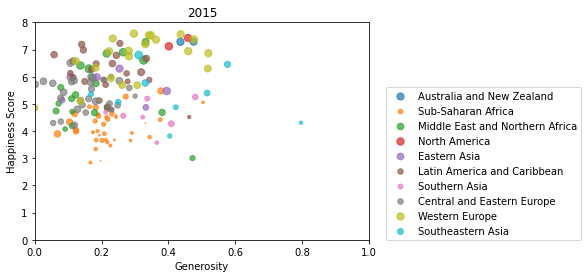

In [74]:
#Plot 1

linearfactor = 40
exponentialfactor = 1
xmax = 1
scatterplot(data2015, 'Generosity', 'Happiness Score', 'Economy (GDP per Capita)' , linearfactor, exponentialfactor, xmax)

The Economy GDP per capita and Freedom (Plot 2 and 3) have more influence on the final happiness outcome. 

For the subsequent years, the plots have similar behavior to their respectively similar analysis.

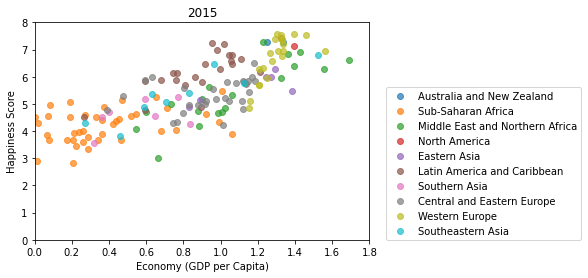

In [75]:
#Plot 2

linearfactor = 1
exponentialfactor = 1
xmax = 1.8
scatterplot(data2015, 'Economy (GDP per Capita)', 'Happiness Score', 'None' , linearfactor, exponentialfactor, xmax)

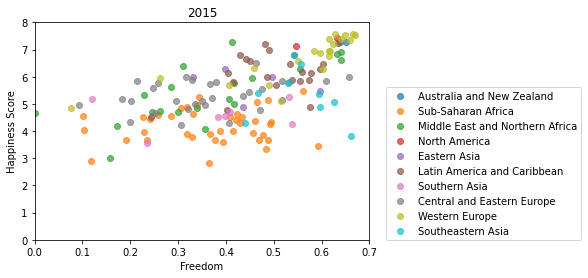

In [76]:
#Plot 3

linearfactor = 1
exponentialfactor = 1
xmax = 0.7
scatterplot(data2015, 'Freedom', 'Happiness Score', 'None', linearfactor, exponentialfactor, xmax)

## Multi Linear Regression for Happiness Score Prediction



In [77]:
#importing the Machine Learning libraries 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [80]:
# Concatening the datasets
df = pd.concat([data2015, data2016, data2017, data2018, data2019])

### Filtering Outliers

Since Myanmar and Syria have an peculiar behavior regarding to Generosity, it is appropriate to leave them aside of this investigation and take this opportunity for futures analysis.

In [81]:
# Filtering out the Myanmar and Syria as a Generosity outliers
df = df[df.Country != 'Myanmar']
df = df[df.Country != 'Syria']

### Setting the data

In [82]:
#Setting the independent (x) and dependent variables(y)
y = df['Happiness Score']
x = df[['Economy (GDP per Capita)', 'Freedom', 'Generosity']]


In [83]:
#Splitting the training and testing data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33, random_state = 42)

In [84]:
# Training the data and predicting the response
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)
y_pred = linear_model.predict(x_test)

In [85]:
y_test.describe()

count    255.000000
mean       5.442976
std        1.111163
min        2.839000
25%        4.610500
50%        5.472000
75%        6.215500
max        7.769000
Name: Happiness Score, dtype: float64

### Root Mean Squared Error

In [86]:
#calculating the Root Mean Squared Error:
rmse = sqrt(mean_squared_error(y_true = y_test, y_pred=y_pred))
rmse

0.567465700011897

## Results Discussions


We can see that, in this particular case, the Multi Linear Regression has a lower error, therefore, performing better prediction than than Decision Tree Model. 

We see that Freedom and Economy GDP play a major role in this particular analysis here and, actually, from the years of 2018 and 2019, the World is getting less generous as the years pass by.

The limitations of this conducted work lie on simplification of the huge amount of possible variables would be needed for, only perhaps, getting an accurate result for Happiness Prediction. Also, a much more broad set of years would be necessary for investigating the impact of global crisis such as wars, economical collapses or pandemics. And, although real world data is messy and noisy, a standardization of the measured variables through the years would also be of great value.